In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. 기존의 프로그램 방식
-회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html

-오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)

-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
-경사하강법 설명
-https://www.mql5.com/ko/articles/11200
28

In [4]:
# 섭씨온도를 입력받아서 화씨온도로 출력
def celsius_to_faherenheit(c):
    return c *1.8 + 32

In [5]:
input_c = int(input('섭씨온도 ?'))
print('화씨온도는', celsius_to_faherenheit(input_c))

섭씨온도 ?1
화씨온도는 33.8


# 2. 머신러닝의 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋으로 분할
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습시키기
6. 모델 평가(시험데이터셋으로)
7. 모델 저장 및 사용(입력값이 주어지면 예측값 받기)

```
# 2.1 노이즈가 없는 데이터로 실습

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 1. 데이터 생성
data_C = np.arange(100)# 0부터 99까지
data_C # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [9]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 :', scaled_data_C)
print('학습시 타겟변수 :', scaled_data_F)

학습시 독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1

In [12]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [15]:
# 3. 모델구성
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape=(1,) ))
# model.add(Dense(1))
model.add(Dense(units = 1,         # 타겟(종속) 변수의 갯수 
                input_shape=(1,))) #입력(독립) 변수의 shape

In [17]:
# 4. 모델 학습과정 설정
model.compile(loss="mse",         # 손실함수 - 모델 학습 중 오차를 최소화하기 위해 사용
             optimizer="rmsprop", # 옵티마이저
             metrics=['mae'])     # 평가지표
# mse : 오차 제곱의 평균(이상치 반영)
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 학습전 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 95ms/step


array([[0.        ],
       [0.01155313]], dtype=float32)

In [20]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [21]:
# 5. 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C, # 입력변수(훈련데이터)
                scaled_data_F,  # 타겟변수(훈련데이터)
                epochs=1000,    # 학습횟수
                verbose=2)      # 학습시 출력여부(0:학습내용출력X)

Epoch 1/1000
4/4 - 0s - loss: 0.4373 - mae: 0.6347 - 327ms/epoch - 82ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.4221 - mae: 0.6233 - 8ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.4113 - mae: 0.6151 - 8ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.4021 - mae: 0.6080 - 8ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.3944 - mae: 0.6019 - 7ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.3871 - mae: 0.5961 - 7ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.3801 - mae: 0.5906 - 9ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.3726 - mae: 0.5845 - 6ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.3653 - mae: 0.5786 - 8ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.3576 - mae: 0.5723 - 10ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.3500 - mae: 0.5660 - 7ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.3427 - mae: 0.5600 - 8ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.3362 - mae: 0.5543 - 10ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss

4/4 - 0s - loss: 0.0052 - mae: 0.0615 - 8ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0049 - mae: 0.0601 - 6ms/epoch - 2ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0047 - mae: 0.0586 - 9ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0044 - mae: 0.0571 - 7ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0042 - mae: 0.0561 - 6ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0041 - mae: 0.0551 - 8ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0039 - mae: 0.0543 - 5ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0038 - mae: 0.0533 - 8ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0037 - mae: 0.0526 - 7ms/epoch - 2ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0036 - mae: 0.0517 - 6ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0506 - 6ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0033 - mae: 0.0500 - 7ms/epoch - 2ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.0032 - mae: 0.0491 - 6ms/epoch - 2ms/step
Epoch 123/1000
4/4 - 0s - l

Epoch 214/1000
4/4 - 0s - loss: 3.9805e-07 - mae: 6.1566e-04 - 8ms/epoch - 2ms/step
Epoch 215/1000
4/4 - 0s - loss: 1.0179e-06 - mae: 9.8607e-04 - 6ms/epoch - 2ms/step
Epoch 216/1000
4/4 - 0s - loss: 1.7486e-07 - mae: 4.0957e-04 - 8ms/epoch - 2ms/step
Epoch 217/1000
4/4 - 0s - loss: 4.4491e-07 - mae: 6.4215e-04 - 7ms/epoch - 2ms/step
Epoch 218/1000
4/4 - 0s - loss: 9.5993e-07 - mae: 9.6250e-04 - 6ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 4.9631e-07 - mae: 6.9182e-04 - 7ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 4.5500e-07 - mae: 6.5649e-04 - 7ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 5.0068e-07 - mae: 6.9318e-04 - 7ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 7.4652e-07 - mae: 8.4692e-04 - 6ms/epoch - 1ms/step
Epoch 223/1000
4/4 - 0s - loss: 9.3494e-07 - mae: 9.3461e-04 - 7ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 4.4920e-09 - mae: 5.6233e-05 - 5ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 2.8447e-08 - mae: 1.5430e-04 - 8ms/epoch - 2

4/4 - 0s - loss: 2.1885e-07 - mae: 4.5054e-04 - 6ms/epoch - 2ms/step
Epoch 313/1000
4/4 - 0s - loss: 3.2613e-07 - mae: 5.4389e-04 - 8ms/epoch - 2ms/step
Epoch 314/1000
4/4 - 0s - loss: 1.0395e-06 - mae: 9.9609e-04 - 6ms/epoch - 2ms/step
Epoch 315/1000
4/4 - 0s - loss: 5.8694e-07 - mae: 7.4234e-04 - 7ms/epoch - 2ms/step
Epoch 316/1000
4/4 - 0s - loss: 4.8072e-07 - mae: 6.6786e-04 - 6ms/epoch - 2ms/step
Epoch 317/1000
4/4 - 0s - loss: 4.3318e-07 - mae: 6.3448e-04 - 7ms/epoch - 2ms/step
Epoch 318/1000
4/4 - 0s - loss: 9.5732e-07 - mae: 9.4809e-04 - 8ms/epoch - 2ms/step
Epoch 319/1000
4/4 - 0s - loss: 2.5674e-07 - mae: 4.9080e-04 - 6ms/epoch - 1ms/step
Epoch 320/1000
4/4 - 0s - loss: 3.4239e-07 - mae: 5.6797e-04 - 6ms/epoch - 1ms/step
Epoch 321/1000
4/4 - 0s - loss: 1.0042e-06 - mae: 9.7740e-04 - 5ms/epoch - 1ms/step
Epoch 322/1000
4/4 - 0s - loss: 3.0617e-07 - mae: 5.4216e-04 - 8ms/epoch - 2ms/step
Epoch 323/1000
4/4 - 0s - loss: 7.5695e-07 - mae: 8.5155e-04 - 6ms/epoch - 2ms/step
Epoch 3

Epoch 410/1000
4/4 - 0s - loss: 1.2508e-06 - mae: 0.0011 - 7ms/epoch - 2ms/step
Epoch 411/1000
4/4 - 0s - loss: 2.0756e-07 - mae: 4.4450e-04 - 5ms/epoch - 1ms/step
Epoch 412/1000
4/4 - 0s - loss: 1.2873e-07 - mae: 3.4533e-04 - 7ms/epoch - 2ms/step
Epoch 413/1000
4/4 - 0s - loss: 1.0342e-06 - mae: 9.7456e-04 - 6ms/epoch - 2ms/step
Epoch 414/1000
4/4 - 0s - loss: 8.4080e-07 - mae: 8.7073e-04 - 5ms/epoch - 1ms/step
Epoch 415/1000
4/4 - 0s - loss: 1.2762e-07 - mae: 3.4908e-04 - 6ms/epoch - 2ms/step
Epoch 416/1000
4/4 - 0s - loss: 4.2095e-07 - mae: 6.2431e-04 - 6ms/epoch - 1ms/step
Epoch 417/1000
4/4 - 0s - loss: 1.2632e-06 - mae: 0.0011 - 6ms/epoch - 2ms/step
Epoch 418/1000
4/4 - 0s - loss: 1.7163e-07 - mae: 4.0391e-04 - 6ms/epoch - 1ms/step
Epoch 419/1000
4/4 - 0s - loss: 1.6410e-07 - mae: 3.9153e-04 - 5ms/epoch - 1ms/step
Epoch 420/1000
4/4 - 0s - loss: 1.1729e-06 - mae: 0.0011 - 17ms/epoch - 4ms/step
Epoch 421/1000
4/4 - 0s - loss: 8.3660e-07 - mae: 8.5640e-04 - 8ms/epoch - 2ms/step
Epo

4/4 - 0s - loss: 1.6160e-07 - mae: 3.8627e-04 - 8ms/epoch - 2ms/step
Epoch 509/1000
4/4 - 0s - loss: 1.1139e-06 - mae: 0.0010 - 7ms/epoch - 2ms/step
Epoch 510/1000
4/4 - 0s - loss: 6.6755e-07 - mae: 7.8728e-04 - 7ms/epoch - 2ms/step
Epoch 511/1000
4/4 - 0s - loss: 4.1482e-07 - mae: 6.3038e-04 - 10ms/epoch - 2ms/step
Epoch 512/1000
4/4 - 0s - loss: 4.0102e-07 - mae: 6.1769e-04 - 6ms/epoch - 2ms/step
Epoch 513/1000
4/4 - 0s - loss: 8.7674e-07 - mae: 9.1550e-04 - 7ms/epoch - 2ms/step
Epoch 514/1000
4/4 - 0s - loss: 2.2693e-07 - mae: 4.6609e-04 - 7ms/epoch - 2ms/step
Epoch 515/1000
4/4 - 0s - loss: 6.4055e-07 - mae: 7.8083e-04 - 7ms/epoch - 2ms/step
Epoch 516/1000
4/4 - 0s - loss: 8.0102e-07 - mae: 8.7773e-04 - 8ms/epoch - 2ms/step
Epoch 517/1000
4/4 - 0s - loss: 4.7600e-07 - mae: 6.7594e-04 - 6ms/epoch - 2ms/step
Epoch 518/1000
4/4 - 0s - loss: 6.1480e-07 - mae: 7.6562e-04 - 8ms/epoch - 2ms/step
Epoch 519/1000
4/4 - 0s - loss: 4.3062e-07 - mae: 6.4048e-04 - 7ms/epoch - 2ms/step
Epoch 520/

4/4 - 0s - loss: 5.6229e-07 - mae: 7.1612e-04 - 7ms/epoch - 2ms/step
Epoch 607/1000
4/4 - 0s - loss: 8.8250e-07 - mae: 9.1062e-04 - 6ms/epoch - 1ms/step
Epoch 608/1000
4/4 - 0s - loss: 5.5278e-07 - mae: 7.2818e-04 - 8ms/epoch - 2ms/step
Epoch 609/1000
4/4 - 0s - loss: 2.9556e-07 - mae: 5.3061e-04 - 5ms/epoch - 1ms/step
Epoch 610/1000
4/4 - 0s - loss: 9.2026e-07 - mae: 9.4021e-04 - 8ms/epoch - 2ms/step
Epoch 611/1000
4/4 - 0s - loss: 3.4790e-07 - mae: 5.8034e-04 - 8ms/epoch - 2ms/step
Epoch 612/1000
4/4 - 0s - loss: 2.9695e-07 - mae: 5.3011e-04 - 6ms/epoch - 2ms/step
Epoch 613/1000
4/4 - 0s - loss: 8.7327e-07 - mae: 9.1762e-04 - 9ms/epoch - 2ms/step
Epoch 614/1000
4/4 - 0s - loss: 6.4196e-07 - mae: 7.7022e-04 - 6ms/epoch - 1ms/step
Epoch 615/1000
4/4 - 0s - loss: 5.0822e-07 - mae: 6.9911e-04 - 8ms/epoch - 2ms/step
Epoch 616/1000
4/4 - 0s - loss: 1.8907e-07 - mae: 4.1706e-04 - 6ms/epoch - 2ms/step
Epoch 617/1000
4/4 - 0s - loss: 9.9255e-07 - mae: 9.6908e-04 - 7ms/epoch - 2ms/step
Epoch 6

4/4 - 0s - loss: 5.2115e-07 - mae: 7.0421e-04 - 9ms/epoch - 2ms/step
Epoch 705/1000
4/4 - 0s - loss: 7.0641e-07 - mae: 8.2399e-04 - 7ms/epoch - 2ms/step
Epoch 706/1000
4/4 - 0s - loss: 6.0425e-07 - mae: 7.5510e-04 - 7ms/epoch - 2ms/step
Epoch 707/1000
4/4 - 0s - loss: 7.2601e-07 - mae: 8.2569e-04 - 7ms/epoch - 2ms/step
Epoch 708/1000
4/4 - 0s - loss: 3.3834e-07 - mae: 5.6709e-04 - 7ms/epoch - 2ms/step
Epoch 709/1000
4/4 - 0s - loss: 4.9811e-07 - mae: 6.8621e-04 - 8ms/epoch - 2ms/step
Epoch 710/1000
4/4 - 0s - loss: 6.6510e-07 - mae: 7.9939e-04 - 6ms/epoch - 1ms/step
Epoch 711/1000
4/4 - 0s - loss: 6.1690e-07 - mae: 7.7036e-04 - 7ms/epoch - 2ms/step
Epoch 712/1000
4/4 - 0s - loss: 4.9832e-07 - mae: 6.9318e-04 - 7ms/epoch - 2ms/step
Epoch 713/1000
4/4 - 0s - loss: 5.8980e-07 - mae: 7.5224e-04 - 8ms/epoch - 2ms/step
Epoch 714/1000
4/4 - 0s - loss: 3.6448e-07 - mae: 5.8900e-04 - 9ms/epoch - 2ms/step
Epoch 715/1000
4/4 - 0s - loss: 3.7168e-07 - mae: 5.9110e-04 - 7ms/epoch - 2ms/step
Epoch 7

Epoch 803/1000
4/4 - 0s - loss: 3.1060e-08 - mae: 1.4918e-04 - 7ms/epoch - 2ms/step
Epoch 804/1000
4/4 - 0s - loss: 6.6538e-07 - mae: 7.3758e-04 - 6ms/epoch - 2ms/step
Epoch 805/1000
4/4 - 0s - loss: 1.3568e-06 - mae: 0.0011 - 6ms/epoch - 1ms/step
Epoch 806/1000
4/4 - 0s - loss: 1.4913e-07 - mae: 3.7479e-04 - 7ms/epoch - 2ms/step
Epoch 807/1000
4/4 - 0s - loss: 1.6070e-07 - mae: 3.8582e-04 - 7ms/epoch - 2ms/step
Epoch 808/1000
4/4 - 0s - loss: 5.3337e-07 - mae: 6.8747e-04 - 6ms/epoch - 1ms/step
Epoch 809/1000
4/4 - 0s - loss: 1.0079e-06 - mae: 9.8659e-04 - 6ms/epoch - 1ms/step
Epoch 810/1000
4/4 - 0s - loss: 3.4098e-08 - mae: 1.5321e-04 - 7ms/epoch - 2ms/step
Epoch 811/1000
4/4 - 0s - loss: 7.8660e-08 - mae: 2.5237e-04 - 7ms/epoch - 2ms/step
Epoch 812/1000
4/4 - 0s - loss: 1.0150e-06 - mae: 9.2774e-04 - 7ms/epoch - 2ms/step
Epoch 813/1000
4/4 - 0s - loss: 7.4268e-07 - mae: 8.2847e-04 - 8ms/epoch - 2ms/step
Epoch 814/1000
4/4 - 0s - loss: 9.7554e-08 - mae: 2.9983e-04 - 5ms/epoch - 1ms/s

4/4 - 0s - loss: 6.6310e-07 - mae: 7.8653e-04 - 8ms/epoch - 2ms/step
Epoch 902/1000
4/4 - 0s - loss: 5.8537e-07 - mae: 7.4304e-04 - 7ms/epoch - 2ms/step
Epoch 903/1000
4/4 - 0s - loss: 1.6294e-07 - mae: 3.9647e-04 - 9ms/epoch - 2ms/step
Epoch 904/1000
4/4 - 0s - loss: 6.0972e-07 - mae: 7.4320e-04 - 7ms/epoch - 2ms/step
Epoch 905/1000
4/4 - 0s - loss: 1.4479e-06 - mae: 0.0011 - 7ms/epoch - 2ms/step
Epoch 906/1000
4/4 - 0s - loss: 9.2725e-08 - mae: 2.7524e-04 - 8ms/epoch - 2ms/step
Epoch 907/1000
4/4 - 0s - loss: 1.1664e-07 - mae: 3.2367e-04 - 6ms/epoch - 2ms/step
Epoch 908/1000
4/4 - 0s - loss: 7.6064e-07 - mae: 8.3000e-04 - 7ms/epoch - 2ms/step
Epoch 909/1000
4/4 - 0s - loss: 1.0101e-06 - mae: 9.6381e-04 - 8ms/epoch - 2ms/step
Epoch 910/1000
4/4 - 0s - loss: 3.2646e-07 - mae: 5.5641e-04 - 7ms/epoch - 2ms/step
Epoch 911/1000
4/4 - 0s - loss: 1.1650e-07 - mae: 3.2973e-04 - 8ms/epoch - 2ms/step
Epoch 912/1000
4/4 - 0s - loss: 1.3199e-06 - mae: 0.0011 - 9ms/epoch - 2ms/step
Epoch 913/1000


4/4 - 0s - loss: 1.1366e-07 - mae: 3.2802e-04 - 6ms/epoch - 2ms/step
Epoch 1000/1000
4/4 - 0s - loss: 7.5692e-07 - mae: 8.4402e-04 - 7ms/epoch - 2ms/step


In [22]:
# 6. 모델 평가(그래프를 통해 loss와 metrex값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[0.43726393580436707, 0.4220579266548157, 0.41131138801574707, 0.40214964747428894, 0.394403338432312]
[0.6346929669380188, 0.6233109831809998, 0.6150661110877991, 0.6080107092857361, 0.6019283533096313]


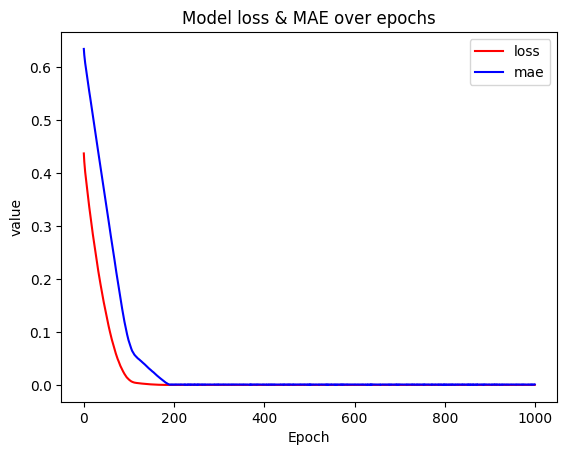

In [27]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() # 범례 label 추가
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [28]:
# 7. 모델 저장 및 사용
# 학습후 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 21ms/step


array([[0.32066494],
       [0.3386734 ]], dtype=float32)

In [29]:
model.save('model/after_learning.h5')

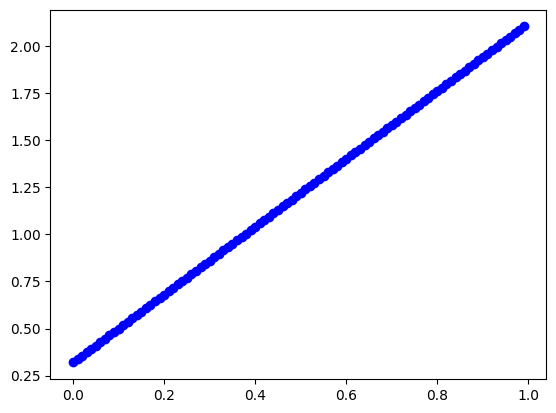

In [30]:
# 실제값
plt.scatter(x=scaled_data_C,
           y=scaled_data_F,
           c='b')
plt.show()

In [33]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{}, 실제값:{}, 오차:{}'.format(h,
                                      y,
                                      h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값:[0.32066494], 실제값:0.32, 오차:0.0006649422645568781
예측값:[0.3386734], 실제값:0.33799999999999997, 오차:0.0006734127998352379
예측값:[0.35668188], 실제값:0.35600000000000004, 오차:0.0006818833351134868
예측값:[0.37469035], 실제값:0.374, 오차:0.0006903538703918466
예측값:[0.3926988], 실제값:0.392, 오차:0.0006987946033477632
예측값:[0.41070727], 실제값:0.41, 오차:0.0007072651386261231
예측값:[0.42871574], 실제값:0.428, 오차:0.0007157356739044274
예측값:[0.4467242], 실제값:0.446, 오차:0.0007242062091827317
예측값:[0.46473265], 실제값:0.46399999999999997, 오차:0.0007326469421387038
예측값:[0.48274115], 실제값:0.48200000000000004, 오차:0.0007411472797393404
예측값:[0.5007496], 실제값:0.5, 오차:0.0007495880126953125
예측값:[0.51875806], 실제값:0.518, 오차:0.0007580585479736168
예측값:[0.5367665], 실제값:0.536, 오차:0.0007665290832519212
예측값:[0.554775], 실제값:0.554, 오차:0.0007749996185302255
예측값:[0.57278347], 실제값:0.5720000000000001, 오차:0.0007834701538085298
예측값:[0.59079194], 실제값:0.59, 오차:0.0007919406890869451
예측값:[0.6088004], 실제값:0.608, 

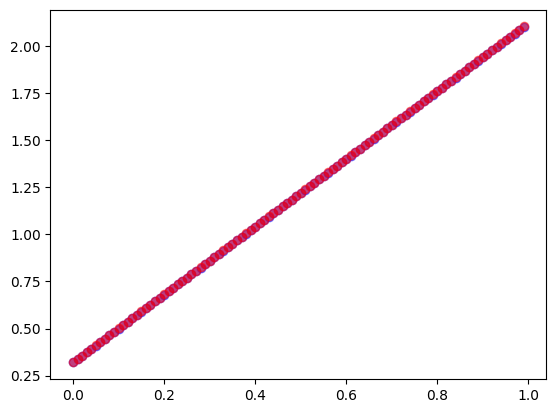

In [35]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [41]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100) # 평균0, 표준편차 0.1개 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

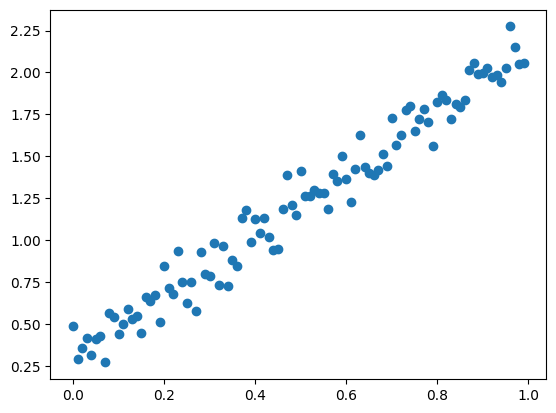

In [42]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [43]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.2132 - mae: 1.8421
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.1677 - mae: 1.8311
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.1326 - mae: 1.8222
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.1084 - mae: 1.8162
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.0821 - mae: 1.8094
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.0601 - mae: 1.8039
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.0346 - mae: 1.7973
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.0123 - mae: 1.7917
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.9894 - mae: 1.7858
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.9670 - mae: 1.7801
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 2.4109 - mae: 1.3274
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3942 - mae: 1.3219
Epoch 90/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3771 - mae: 1.3164
Epoch 91/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3604 - mae: 1.3110
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3418 - mae: 1.3048
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3250 - mae: 1.2994
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.3078 - mae: 1.2936
Epoch 95/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2903 - mae: 1.2879
Epoch 96/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2734 - mae: 1.2822
Epoch 97/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.2578 - mae: 1.2771
Epoch 98/1000
4/4 [==============================] - 0s 2ms/step - loss: 2

4/4 [==============================] - 0s 2ms/step - loss: 1.1993 - mae: 0.8933
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1883 - mae: 0.8891
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1758 - mae: 0.8840
Epoch 177/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1644 - mae: 0.8796
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1528 - mae: 0.8750
Epoch 179/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1427 - mae: 0.8709
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1344 - mae: 0.8676
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1242 - mae: 0.8633
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1130 - mae: 0.8588
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1024 - mae: 0.8544
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.5152 - mae: 0.5979
Epoch 261/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5088 - mae: 0.5946
Epoch 262/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5037 - mae: 0.5920
Epoch 263/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4980 - mae: 0.5892
Epoch 264/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4930 - mae: 0.5867
Epoch 265/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4886 - mae: 0.5845
Epoch 266/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4832 - mae: 0.5818
Epoch 267/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4782 - mae: 0.5791
Epoch 268/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4731 - mae: 0.5764
Epoch 269/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4693 - mae: 0.5745
Epoch 270/1000
4/4 [==============================] - 0s 6ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.2849 - mae: 0.4593
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2838 - mae: 0.4584
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2826 - mae: 0.4574
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2815 - mae: 0.4565
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2806 - mae: 0.4557
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2792 - mae: 0.4545
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2782 - mae: 0.4537
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2771 - mae: 0.4527
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2763 - mae: 0.4521
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2753 - mae: 0.4511
Epoch 356/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.2064 - mae: 0.3885
Epoch 433/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2056 - mae: 0.3876
Epoch 434/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2048 - mae: 0.3870
Epoch 435/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2039 - mae: 0.3861
Epoch 436/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2030 - mae: 0.3852
Epoch 437/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2021 - mae: 0.3844
Epoch 438/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2014 - mae: 0.3837
Epoch 439/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2005 - mae: 0.3828
Epoch 440/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1996 - mae: 0.3819
Epoch 441/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1986 - mae: 0.3810
Epoch 442/1000
4/4 [==============================] - 0s 3ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.1410 - mae: 0.3195
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1402 - mae: 0.3185
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1395 - mae: 0.3178
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1388 - mae: 0.3169
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1381 - mae: 0.3161
Epoch 523/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1372 - mae: 0.3150
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1364 - mae: 0.3141
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1357 - mae: 0.3133
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1351 - mae: 0.3126
Epoch 527/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1344 - mae: 0.3117
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0878 - mae: 0.2501
Epoch 605/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0873 - mae: 0.2493
Epoch 606/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0867 - mae: 0.2483
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0862 - mae: 0.2477
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0858 - mae: 0.2471
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0853 - mae: 0.2462
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0847 - mae: 0.2453
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0843 - mae: 0.2446
Epoch 612/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0837 - mae: 0.2438
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0832 - mae: 0.2429
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0492 - mae: 0.1851
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0488 - mae: 0.1844
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0485 - mae: 0.1837
Epoch 693/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0481 - mae: 0.1830
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0478 - mae: 0.1824
Epoch 695/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0474 - mae: 0.1816
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0470 - mae: 0.1807
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0467 - mae: 0.1802
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0463 - mae: 0.1795
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0460 - mae: 0.1789
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1303
Epoch 777/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0248 - mae: 0.1300
Epoch 778/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0246 - mae: 0.1297
Epoch 779/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0244 - mae: 0.1291
Epoch 780/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0242 - mae: 0.1286
Epoch 781/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0240 - mae: 0.1279
Epoch 782/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1274
Epoch 783/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0236 - mae: 0.1270
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0234 - mae: 0.1262
Epoch 785/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0232 - mae: 0.1256
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0930
Epoch 863/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0135 - mae: 0.0927
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0925
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0922
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0919
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0917
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0915
Epoch 869/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0912
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0908
Epoch 871/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0905
Epoch 872/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0809
Epoch 949/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0810
Epoch 950/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0812
Epoch 951/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0809
Epoch 952/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0809
Epoch 953/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 954/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 955/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 956/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0807
Epoch 957/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0806
Epoch 958/1000
4/4 [==============================] - 0s 2ms/step

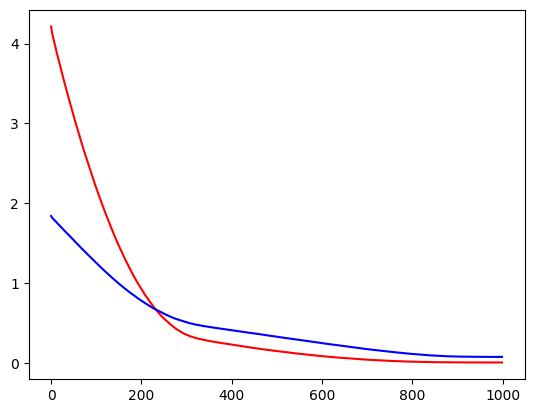

In [47]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [54]:
model2.save('model/noise_after_learning.h5')

In [49]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [51]:
for h, y in zip(y_hat, noised_scaled_data_F):
    print("실제값:{}", "예측값:{}", "오차:{}".format(y,
                                            h,
                                            h[0]-y))

실제값:{} 예측값:{} 오차:0.48905257038003563
실제값:{} 예측값:{} 오차:0.2914062629459167
실제값:{} 예측값:{} 오차:0.3592820163678585
실제값:{} 예측값:{} 오차:0.4147516282996508
실제값:{} 예측값:{} 오차:0.31310769713742614
실제값:{} 예측값:{} 오차:0.4102065572905948
실제값:{} 예측값:{} 오차:0.42791096141420687
실제값:{} 예측값:{} 오차:0.2705275693654579
실제값:{} 예측값:{} 오차:0.5657658005663493
실제값:{} 예측값:{} 오차:0.542049851591955
실제값:{} 예측값:{} 오차:0.43745710260332404
실제값:{} 예측값:{} 오차:0.5008451738804279
실제값:{} 예측값:{} 오차:0.5865299374196752
실제값:{} 예측값:{} 오차:0.5278643584808353
실제값:{} 예측값:{} 오차:0.5477250921327455
실제값:{} 예측값:{} 오차:0.44467585875092086
실제값:{} 예측값:{} 오차:0.6634580311891888
실제값:{} 예측값:{} 오차:0.6383880905287038
실제값:{} 예측값:{} 오차:0.6714459923759963
실제값:{} 예측값:{} 오차:0.509347546813016
실제값:{} 예측값:{} 오차:0.8450699691186476
실제값:{} 예측값:{} 오차:0.7134335535456359
실제값:{} 예측값:{} 오차:0.6772860056713612
실제값:{} 예측값:{} 오차:0.9369072220761113
실제값:{} 예측값:{} 오차:0.7474613970139354
실제값:{} 예측값:{} 오차:0.6249321300853425
실제값:{} 예측값:{} 오차:0.7474772144572315
실제값:{} 예측값:{} 오차:0.577168

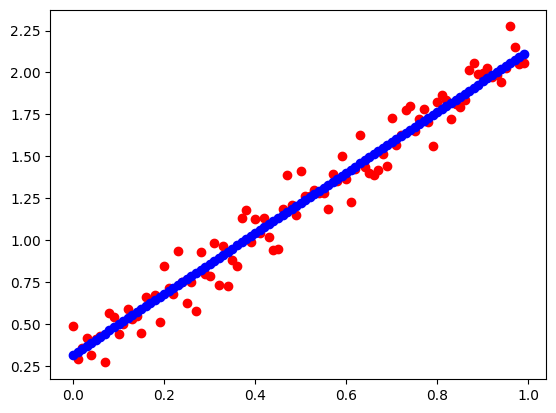

In [53]:
plt.scatter(x=scaled_data_C,
           y=noised_scaled_data_F, 
           c='r')
plt.scatter(x=scaled_data_C,
           y=y_hat,
           c='b')